In [1]:
#from fraud_detection import *

import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path + "\\common")

from classification import *
from visualization import *

df = pd.read_csv('creditcard.csv')

print(df)

Using TensorFlow backend.


            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
5            2.0  -0.425966   0.960523  1.141109 -0.168252  0.420987   
6            4.0   1.229658   0.141004  0.045371  1.202613  0.191881   
7            7.0  -0.644269   1.417964  1.074380 -0.492199  0.948934   
8            7.0  -0.894286   0.286157 -0.113192 -0.271526  2.669599   
9            9.0  -0.338262   1.119593  1.044367 -0.222187  0.499361   
10          10.0   1.449044  -1.176339  0.913860 -1.375667 -1.971383   
11          10.0   0.384978   0.616109 -0.874300 -0.094019  2.924584   
12          10.0   1.249999  -1.221637  0.383930 -1.234899 -1.48

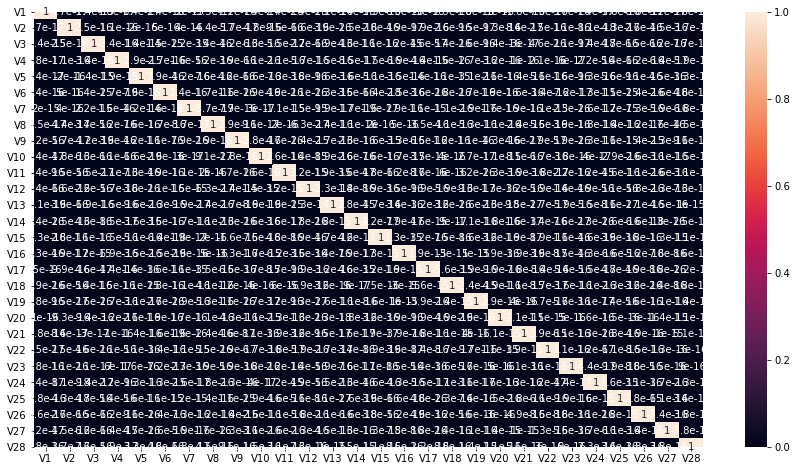

In [2]:
vis = Visualization(df)

vis.plot_corr([f for f in df.columns if f.startswith('V')])

Running  run
Running  classifier


C:\Users\Lion Alio\Anaconda3\envs\torch-gpu\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Time elapsed:  71.67519211769104
Running  evaluate
accuracy_score:  0.9990519995786665
confusion matrix for  LogisticRegression :  [[56852    10]
 [   44    56]]


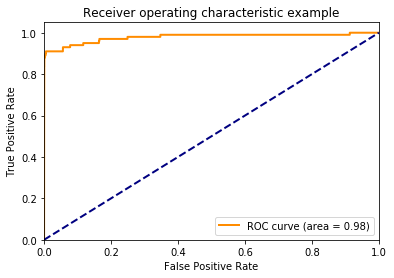

Time elapsed:  0.42685937881469727
Time elapsed:  72.7423369884491
Running  run
Running  classifier


C:\Users\Lion Alio\Anaconda3\envs\torch-gpu\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Time elapsed:  365.0834262371063
Running  evaluate
accuracy_score:  0.9994908886626171
confusion matrix for  DecisionTreeClassifier :  [[56852    10]
 [   19    81]]


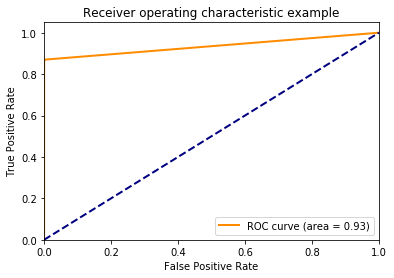

Time elapsed:  0.31116771697998047
Time elapsed:  365.94611644744873


In [3]:

preprocessings = {
    'imputer': None,
    'mapping': None,
    'dim_reduce': False,
    'preprocess': StandardScaler()
}

#preprocessings = [
#    StandardScaler()
#]

classifiers = [
    LogisticRegression(solver='lbfgs'),
    DecisionTreeClassifier(),
    #xgb.XGBClassifier()  # Take insanely long time to run. Why???
]

parameters = [
    {
        'penalty': ['l2'],
        'C': [0.1, 0.5, 1., 2.],
        'max_iter': [100, 200, 500, 1000]
    },
    {
        'criterion':['gini','entropy'],
        'max_depth':[5, 8, 10, 20, 50]
    },
    #{
    #    "learning_rate": [0.05, 0.10, 0.15],
    #    "max_depth": [ 3, 5, 8],
    #    "min_child_weight": [ 1, 3, 5],
    #    "gamma":[ 0.0, 0.1, 0.5],
    #    'eval_metric': ['mlogloss']
    #}
]

detector = Classification('creditcard.csv', [f for f in df.columns if f != 'Class' and f != 'Time'], 'Class')
detector.set_methods_process(preprocessings)
for clf, params in zip(classifiers, parameters):
    detector.set_methods(clf)
    detector.set_parameters(params)
    detector.run()

#for prep in preprocessings:
#    for clf, params in zip(classifiers, parameters):
#        detector.set_methods(prep, clf)
#        detector.set_parameters(params)
#        detector.run()